In [1]:
#importing common file 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#To ingnore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading csv file
raw = pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\Company_Data (1).csv")
raw

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
#info
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
#describe
raw.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
#checking null values
raw.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
#checking duplicates
raw.duplicated().sum()

0

<AxesSubplot:>

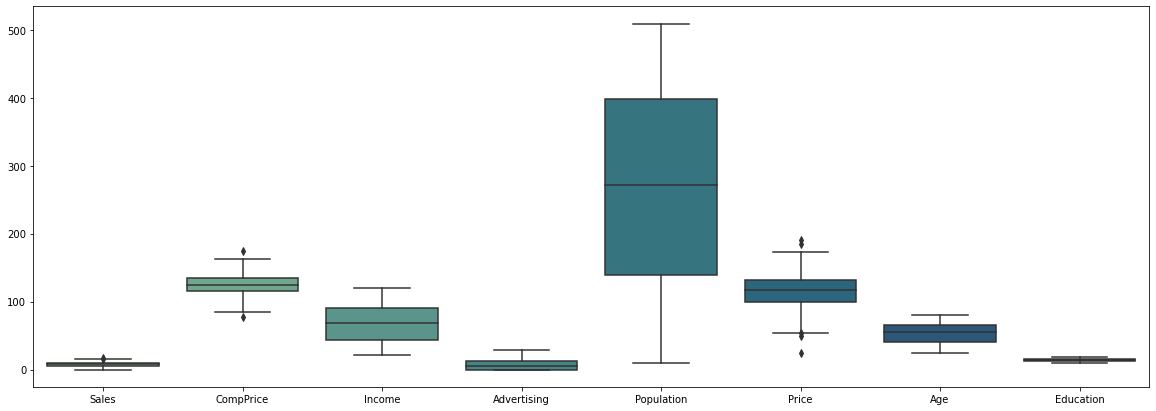

In [7]:
#detecting outliers
fig=plt.figure(figsize=(20,7))
sns.boxplot(data=raw,palette='crest')

There are few outliers present in features such as price,compprice and sales.

In [8]:
raw['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [9]:
#trating sales as if sales between 0 - 5.39 = Low sale, sales 5.39 - 9.32 = Medium sale and sales 9.32 - 17 = High sale
raw['Sales_cat'] = pd.cut(x=raw['Sales'],bins=[0,5.39,9.32,17],labels = ['Low','Medium','High'],right=False)
raw

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Medium


In [10]:
#dropping Sales column
df = raw.drop('Sales',axis=1)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


#data visualization

In [11]:
df.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_cat'],
      dtype='object')

In [12]:
numerical_col=df[['CompPrice', 'Income', 'Advertising', 'Population', 'Price','Age', 'Education']]
categorical_col=df[['ShelveLoc','Urban', 'US', 'Sales_cat']]

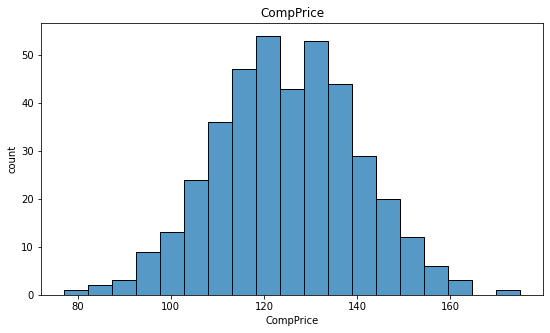

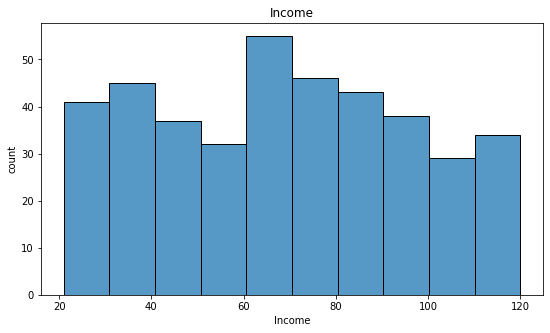

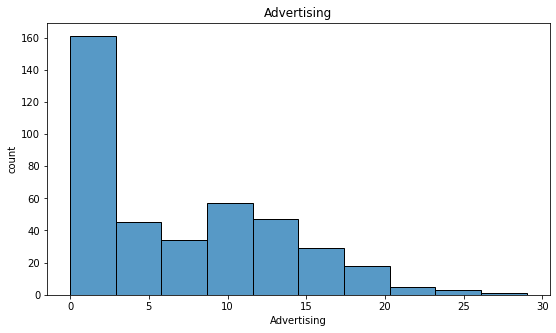

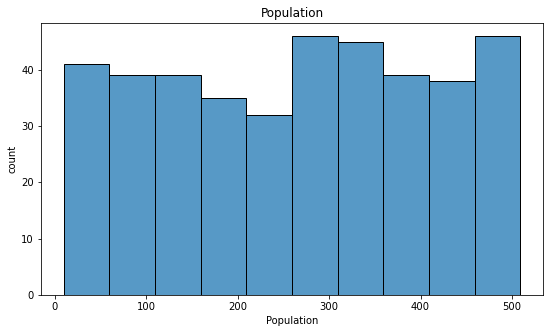

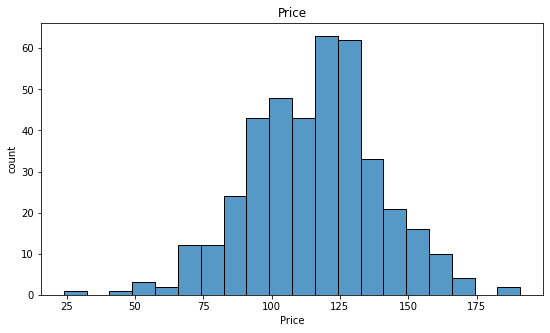

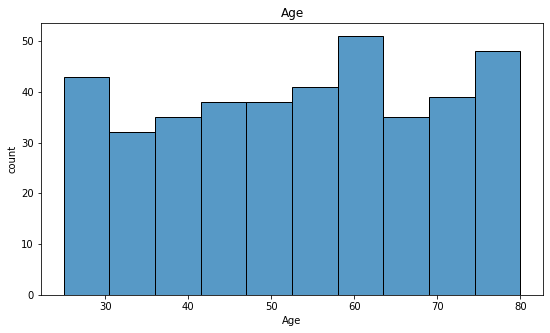

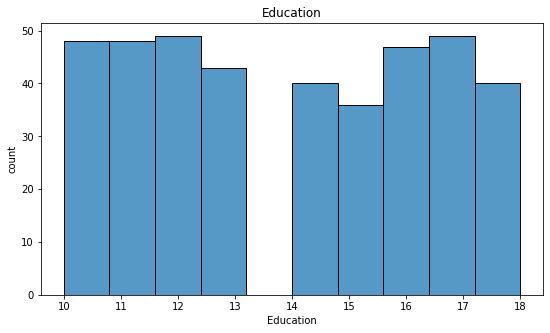

In [13]:
 for feature in numerical_col.columns:
        data=numerical_col.copy()
        plt.figure(figsize=(9,5))
        sns.histplot(df[feature])
        plt.title(feature)
        plt.ylabel('count')
        plt.xlabel(feature)

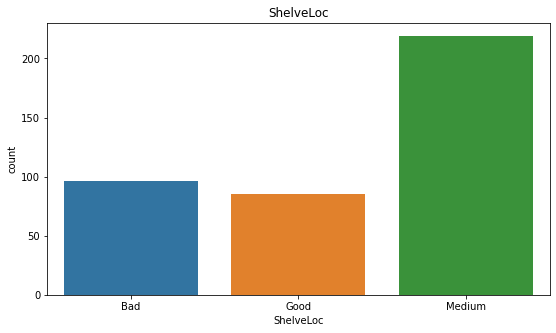

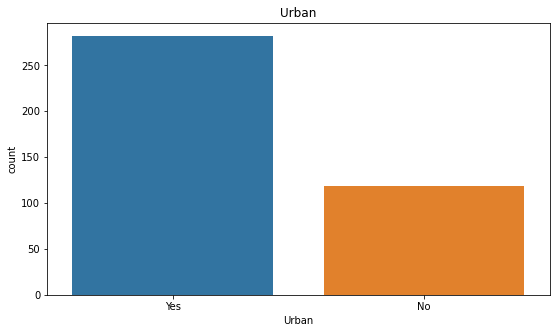

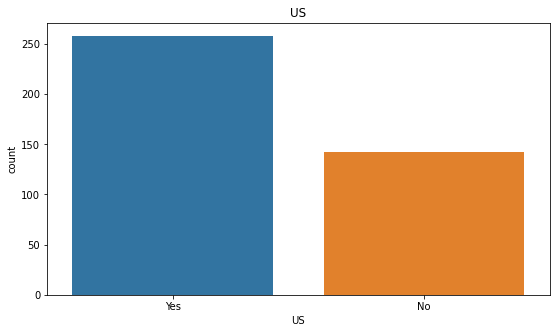

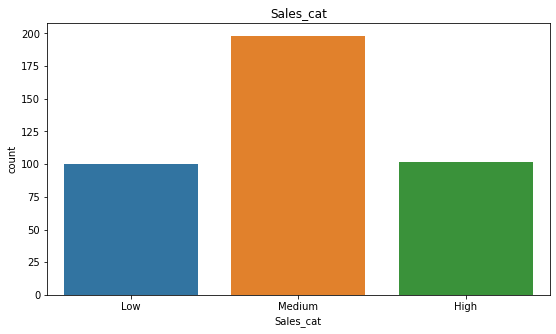

In [14]:
for feature in categorical_col.columns:
        data=categorical_col.copy()
        plt.figure(figsize=(9,5))
        sns.countplot(df[feature])
        plt.title(feature)
        plt.ylabel('count')
        plt.xlabel(feature)

from the above countplot we can see that,most of the stores are able to maintain 'Medium' shelveLoc and that may lead to high 'Medium' sales.most of the people are from 'Urban' areas.

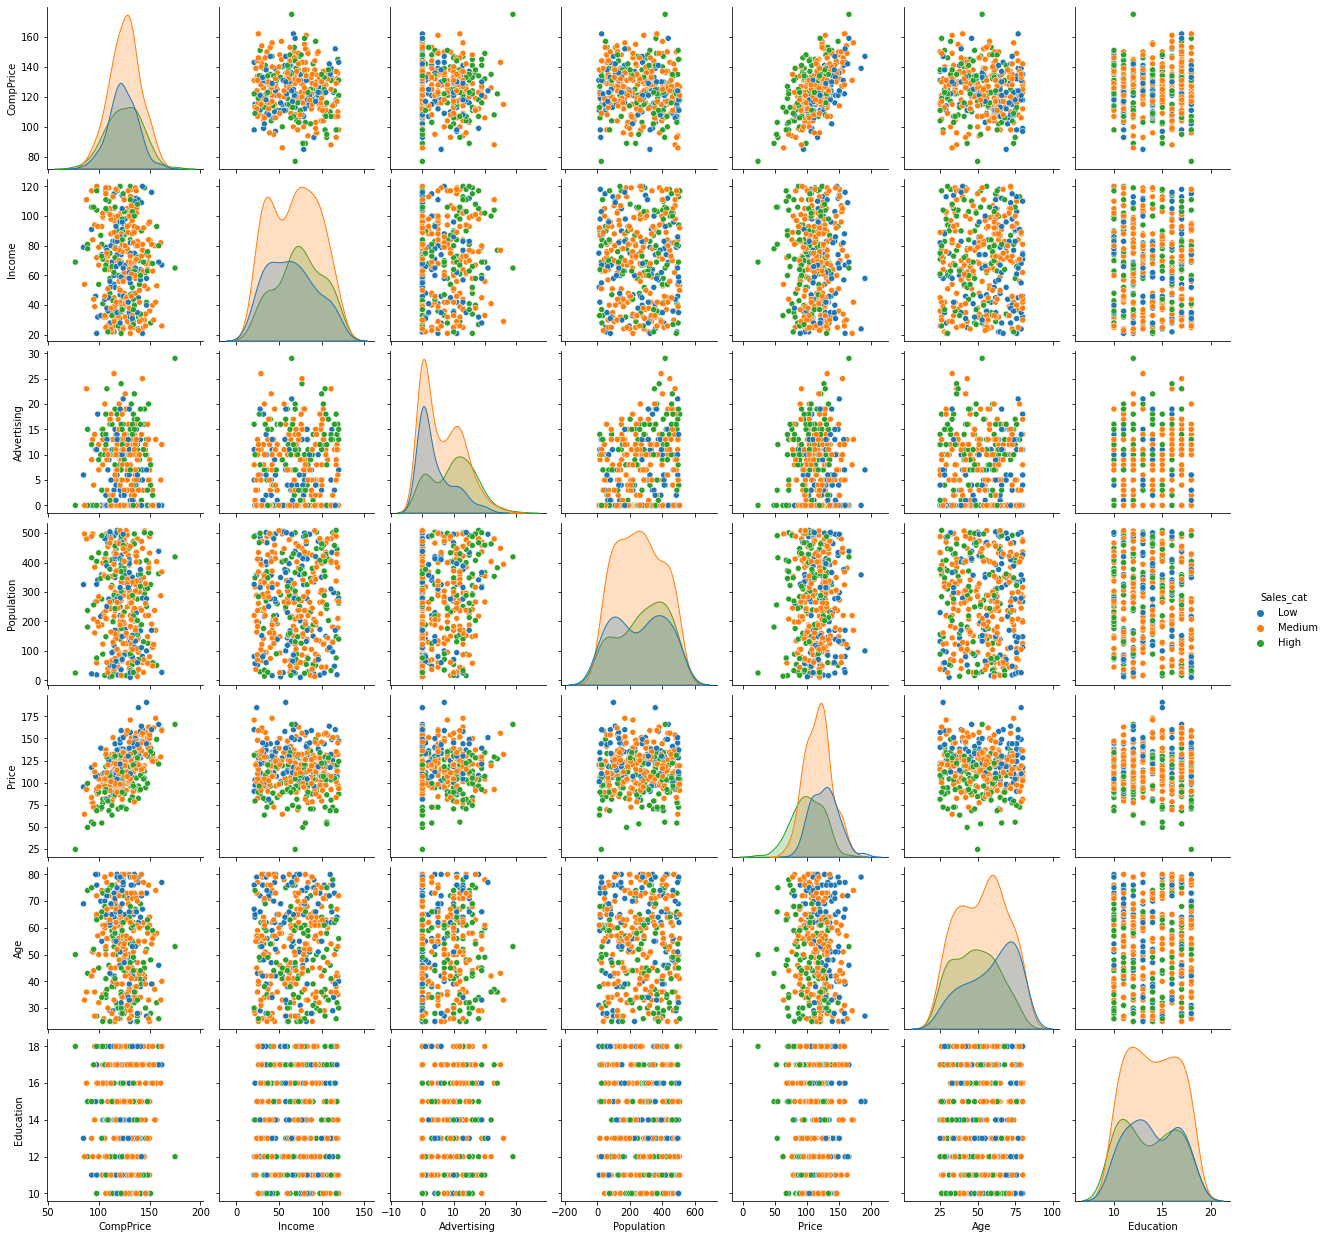

In [15]:
#multivariate analysis
sns.pairplot(df,hue='Sales_cat')

In [16]:
#analysing categorical variable with respect to sales_cat

In [17]:
#Sales_cat with respect to ShelveLoc
j_df = pd.DataFrame()
j_df['Low'] = df[df['Sales_cat'] == 'Low']['ShelveLoc'].value_counts()
j_df['Medium'] = df[df['Sales_cat'] == 'Medium']['ShelveLoc'].value_counts()
j_df['High'] = df[df['Sales_cat'] == 'High']['ShelveLoc'].value_counts()
j_df

,Low,Medium,High
Bad,52,38,6
Medium,46,130,43
Good,2,30,53


<AxesSubplot:>

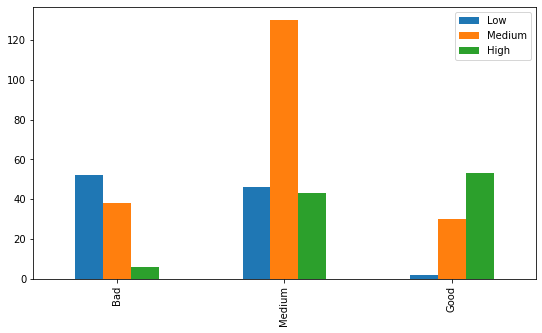

In [18]:
j_df.plot(kind='bar',figsize=(9,5))

*From the above result we can conclude that because of good shelve location the rate of high Sales increases.

In [19]:
#Sales_cat with respect to Urban

a_df = pd.DataFrame()
a_df['Low']=df[df['Sales_cat'] == 'Low']['Urban'].value_counts()
a_df['Medium']=df[df['Sales_cat'] == 'Medium']['Urban'].value_counts()
a_df['High']=df[df['Sales_cat'] == 'High']['Urban'].value_counts()
a_df

,Low,Medium,High
Yes,71,141,70
No,29,57,32


<AxesSubplot:>

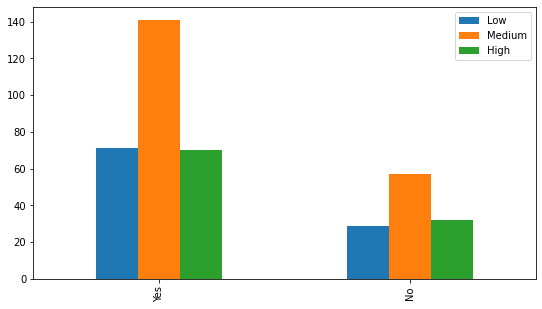

In [20]:
a_df.plot(kind='bar',figsize=(9,5))

*Most of the high Sales are made from the Urban areas as compare to the ruler areas.

In [21]:
#Sales_cat with respect to Us

b_df = pd.DataFrame()
b_df['Low']=df[df['Sales_cat'] == 'Low']['US'].value_counts()
b_df['Medium']=df[df['Sales_cat'] == 'Medium']['US'].value_counts()
b_df['High']=df[df['Sales_cat'] == 'High']['US'].value_counts()
b_df

,Low,Medium,High
Yes,54,120,84
No,46,78,18


<AxesSubplot:>

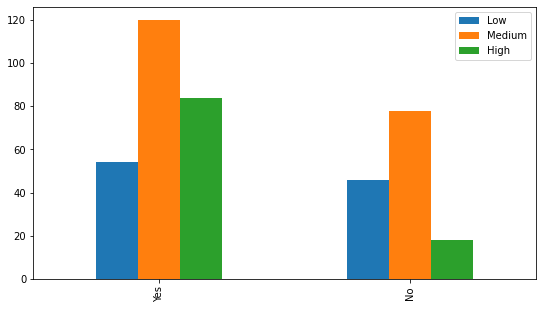

In [22]:
b_df.plot(kind='bar',figsize=(9,5))

*conclusion-most of the high sales are made from US as campared to any other.

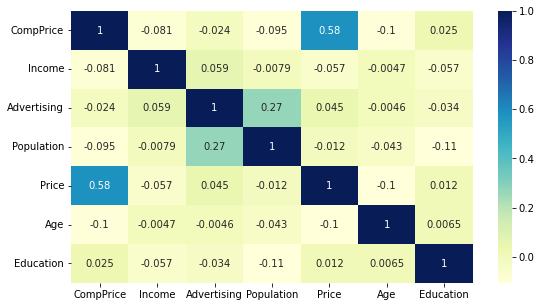

In [23]:
#correaltion analysis
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu");

*from we can see that there is moderate colinearity between Price and ComPrice,also there is simple colinearity between Advertising and Population.

In [24]:
#One-hot-encoding on input data and label encoding on target data
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Medium


In [25]:
#importing library for label encoding
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
df['Sales_cat']=le.fit_transform(df['Sales_cat'])

In [27]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,0
1,111,48,16,260,83,Good,65,10,Yes,Yes,0
2,113,35,10,269,80,Medium,59,12,Yes,Yes,0
3,117,100,4,466,97,Medium,55,14,Yes,Yes,2
4,141,64,3,340,128,Bad,38,13,Yes,No,1


Note- "High Sale" = '0',"Medium Sale" = '2' and "Low Sale" = '1'

In [28]:
#one hot encoding on input data
df1 = pd.get_dummies(df)

In [29]:
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_cat,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,0,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,2,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,2,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,2,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,2,1,0,0,0,1,0,1


In [47]:
# define input variable
X = df1.drop(['Sales_cat'],axis=1)

In [48]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [226]:
#define target variable
Y = df1[['Sales_cat']]
Y.head()

,Sales_cat
0,0
1,0
2,0
3,2
4,1


In [227]:
#spliting data using train and test data
#importing library 
from sklearn.model_selection import train_test_split

In [228]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=20,stratify=Y)

In [229]:
#printing shape
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((268, 14), (268, 1), (132, 14), (132, 1))

Building Random Forest using "Entropy" criterion.

In [230]:
#importing necessary libarary
from sklearn.ensemble import RandomForestClassifier

In [245]:
#instantiating an object 
model_1 = RandomForestClassifier(n_estimators=100,criterion='entropy',bootstrap=True,max_depth=5)

#fitting on train data
model_1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [246]:
#prediction on test data
y_pred = model_1.predict(x_test)

In [247]:
y_pred

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 2,
       2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2])

In [248]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix

In [249]:
print(confusion_matrix(y_test,y_pred))

[[18  0 16]
 [ 0  9 24]
 [ 2  3 60]]


In [250]:
#importing classification report
from sklearn.metrics import classification_report

In [251]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.53      0.67        34
           1       0.75      0.27      0.40        33
           2       0.60      0.92      0.73        65

    accuracy                           0.66       132
   macro avg       0.75      0.58      0.60       132
weighted avg       0.71      0.66      0.63       132



Building Random Forest model using "gini" criterion

In [252]:
#building gini model
model_2 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,bootstrap=True)

#fitting on train data
model_2.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [253]:
#predicting on test data
y_pred1=model_2.predict(x_test)

In [254]:
y_pred1

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2])

In [255]:
#confusion matrix
print(confusion_matrix(y_test,y_pred1))

[[20  0 14]
 [ 0 11 22]
 [ 1  1 63]]


In [256]:
#classification report 
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73        34
           1       0.92      0.33      0.49        33
           2       0.64      0.97      0.77        65

    accuracy                           0.71       132
   macro avg       0.84      0.63      0.66       132
weighted avg       0.79      0.71      0.69       132



Accuracy of model_2 is greater than model_1 which is 71%.

Extracting Tree and plotting Tree From Forest.

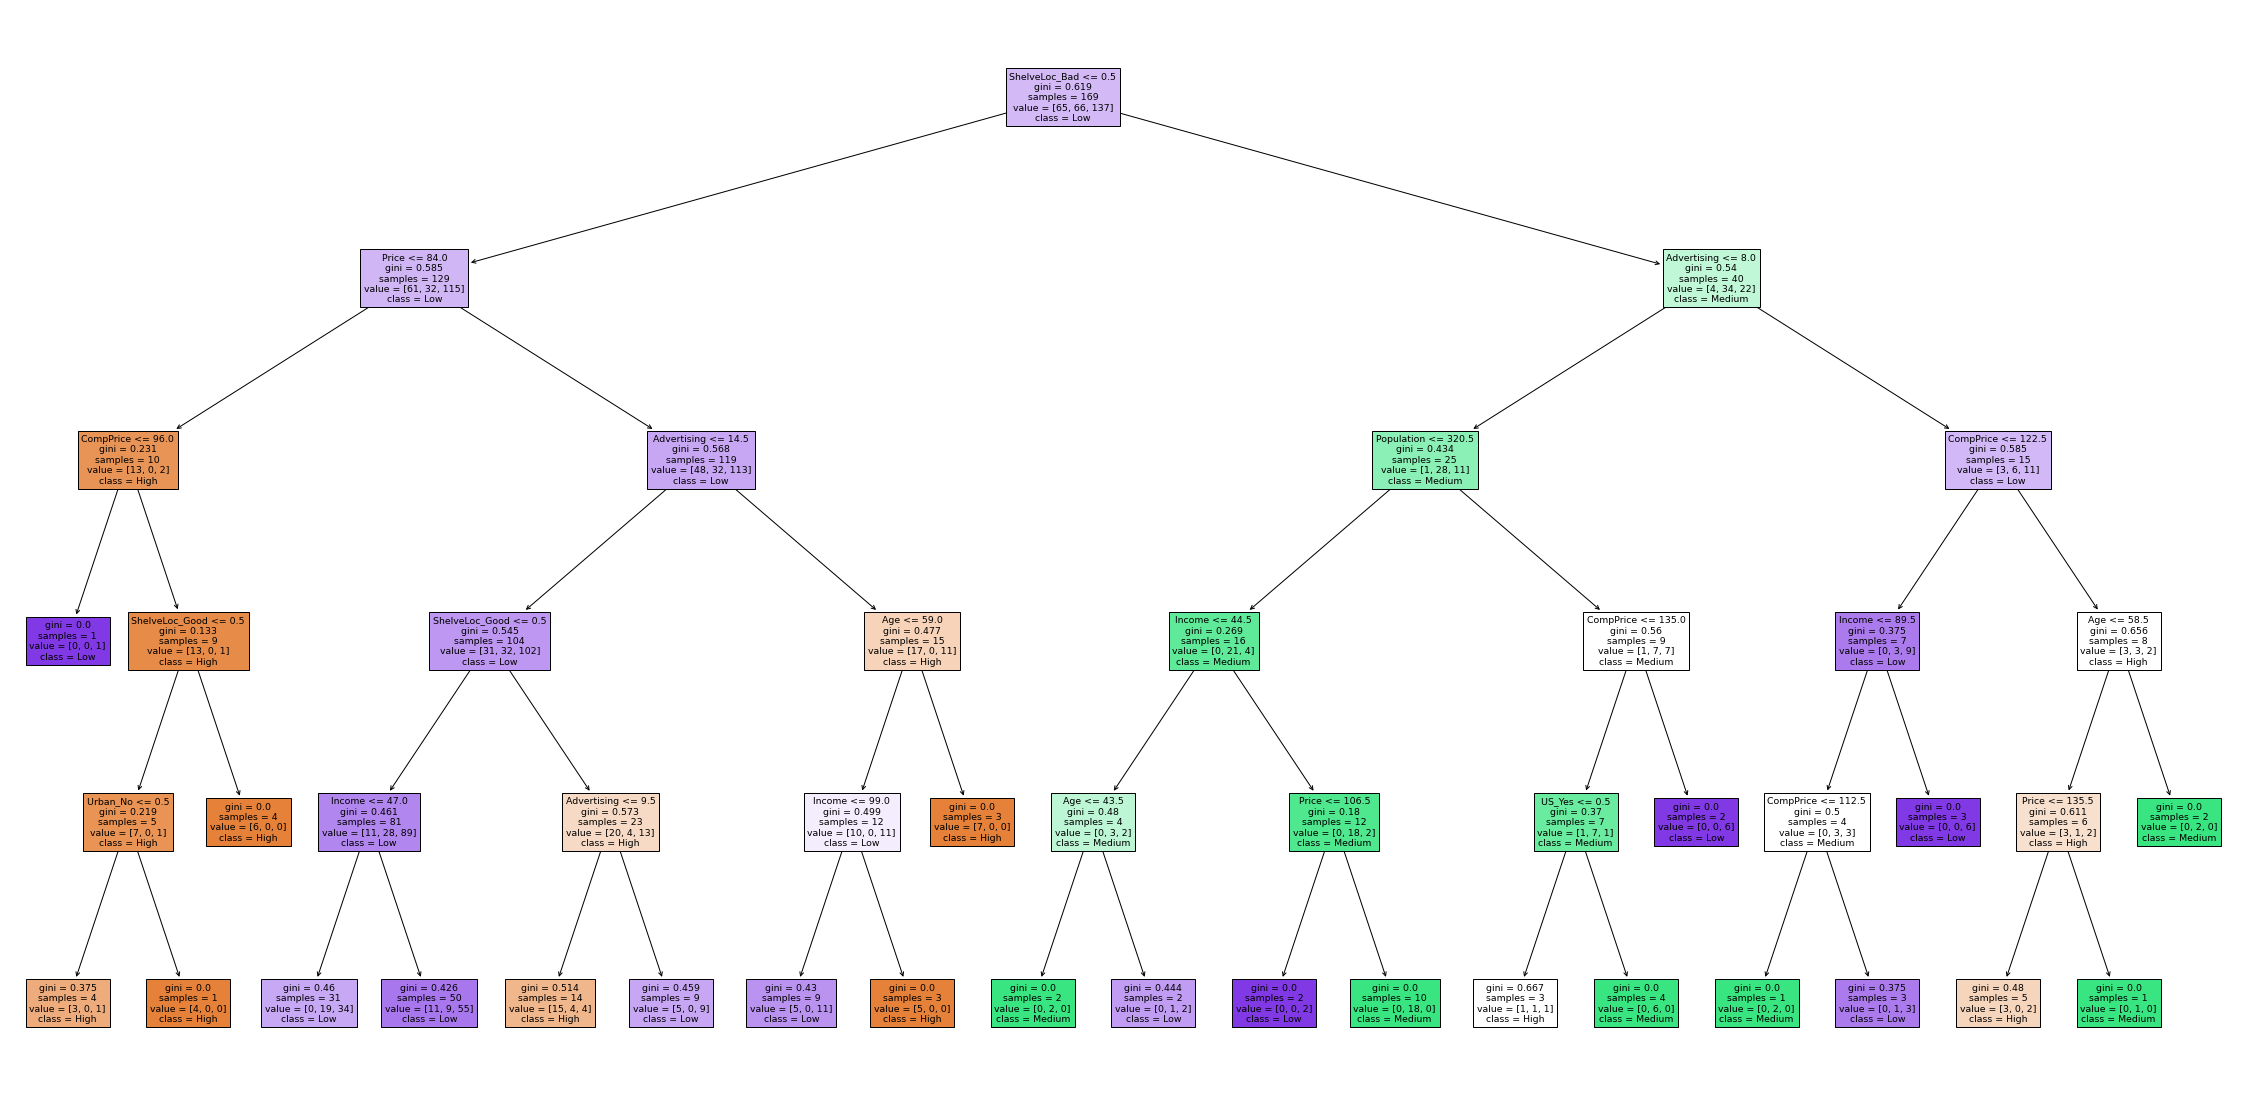

In [280]:
#Tree - 40
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(model_2.estimators_[40], feature_names = X.columns,class_names=raw.Sales_cat.unique(),filled=True)
plt.show()


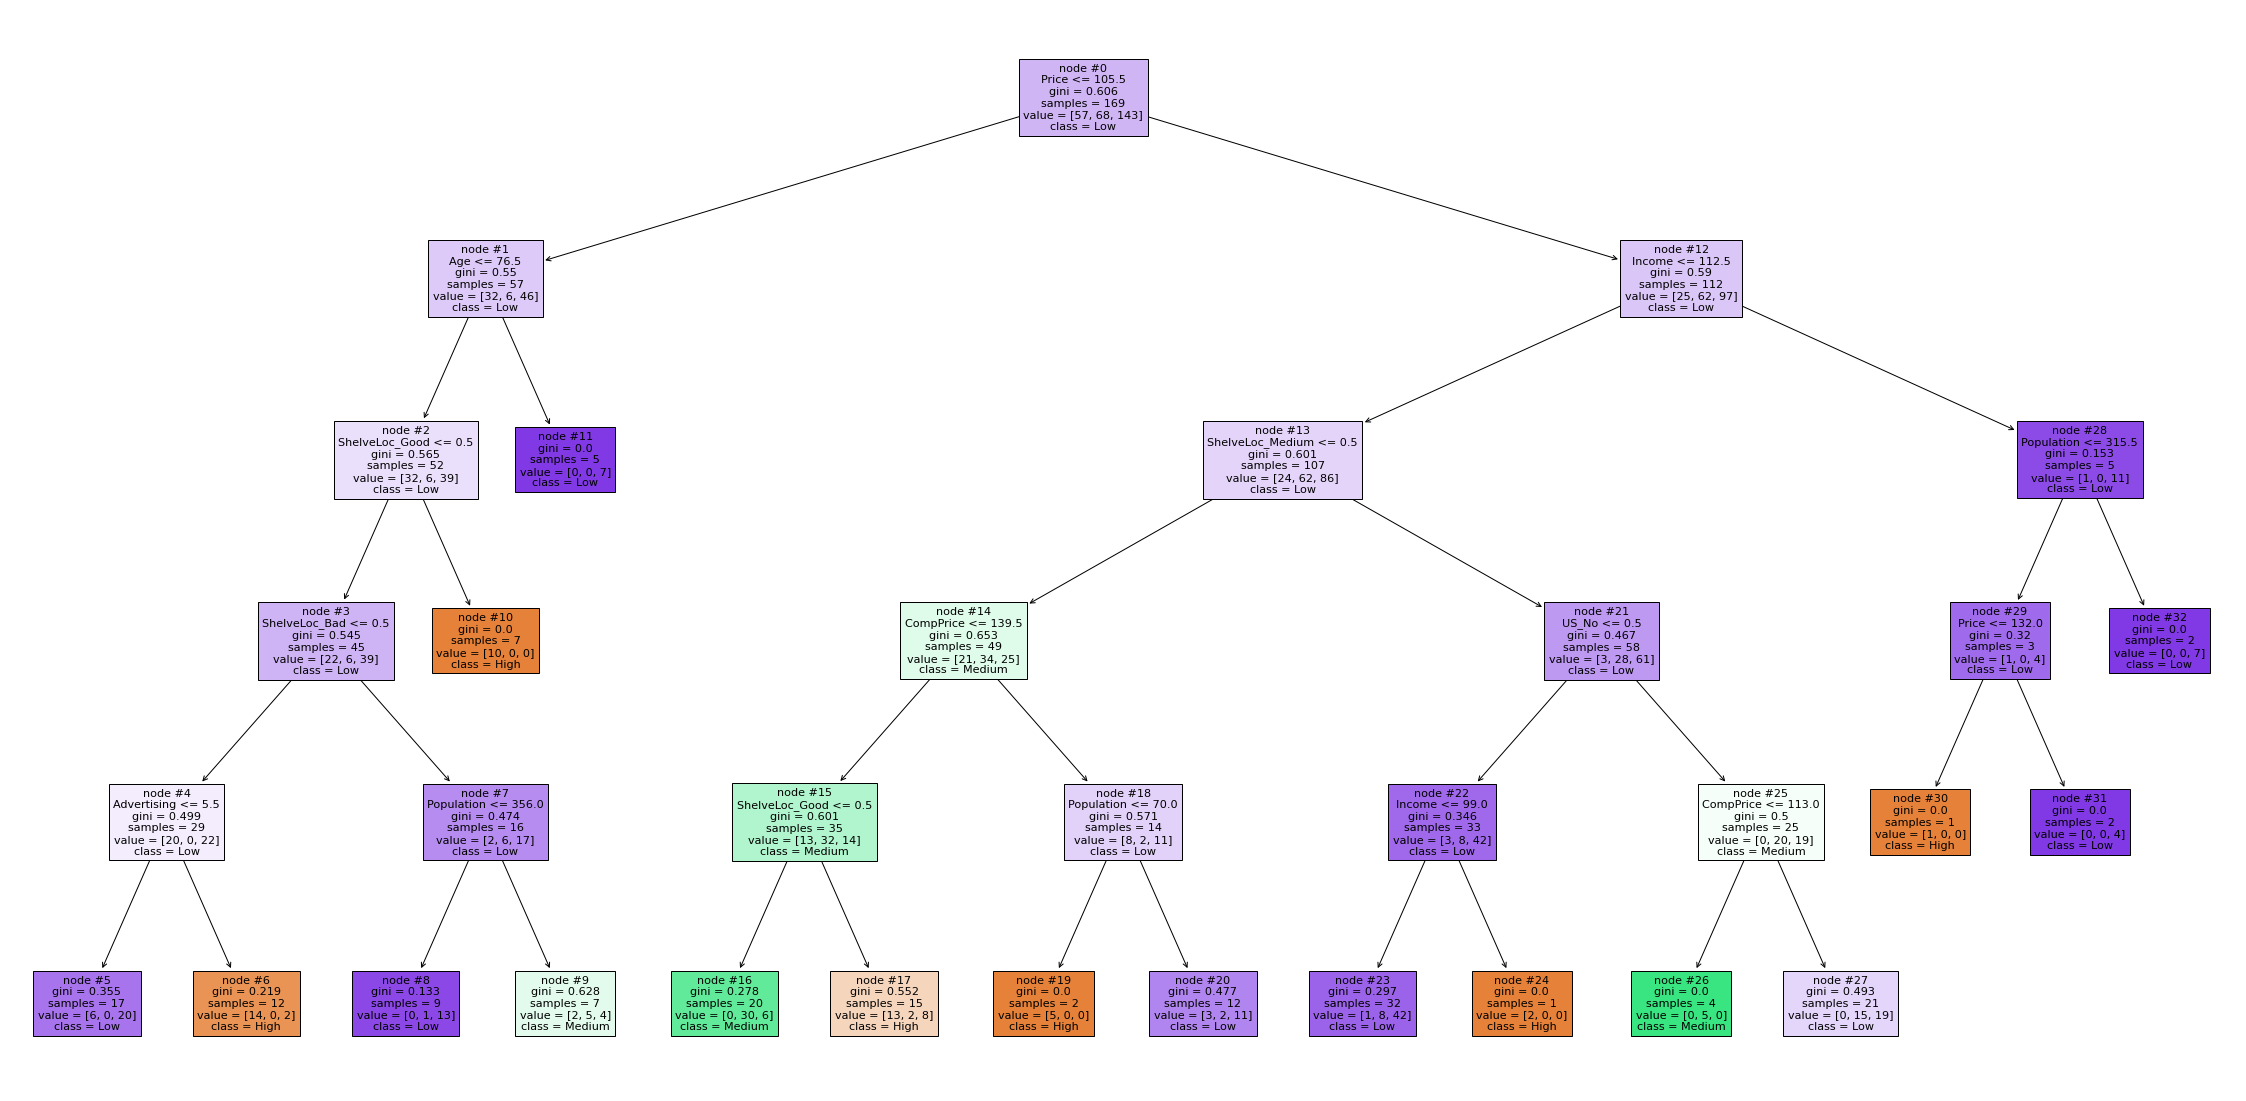

In [282]:
#tree - 88
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(model_2.estimators_[88], feature_names = X.columns,class_names=raw.Sales_cat.unique(),filled=True,node_ids=True)
plt.show()

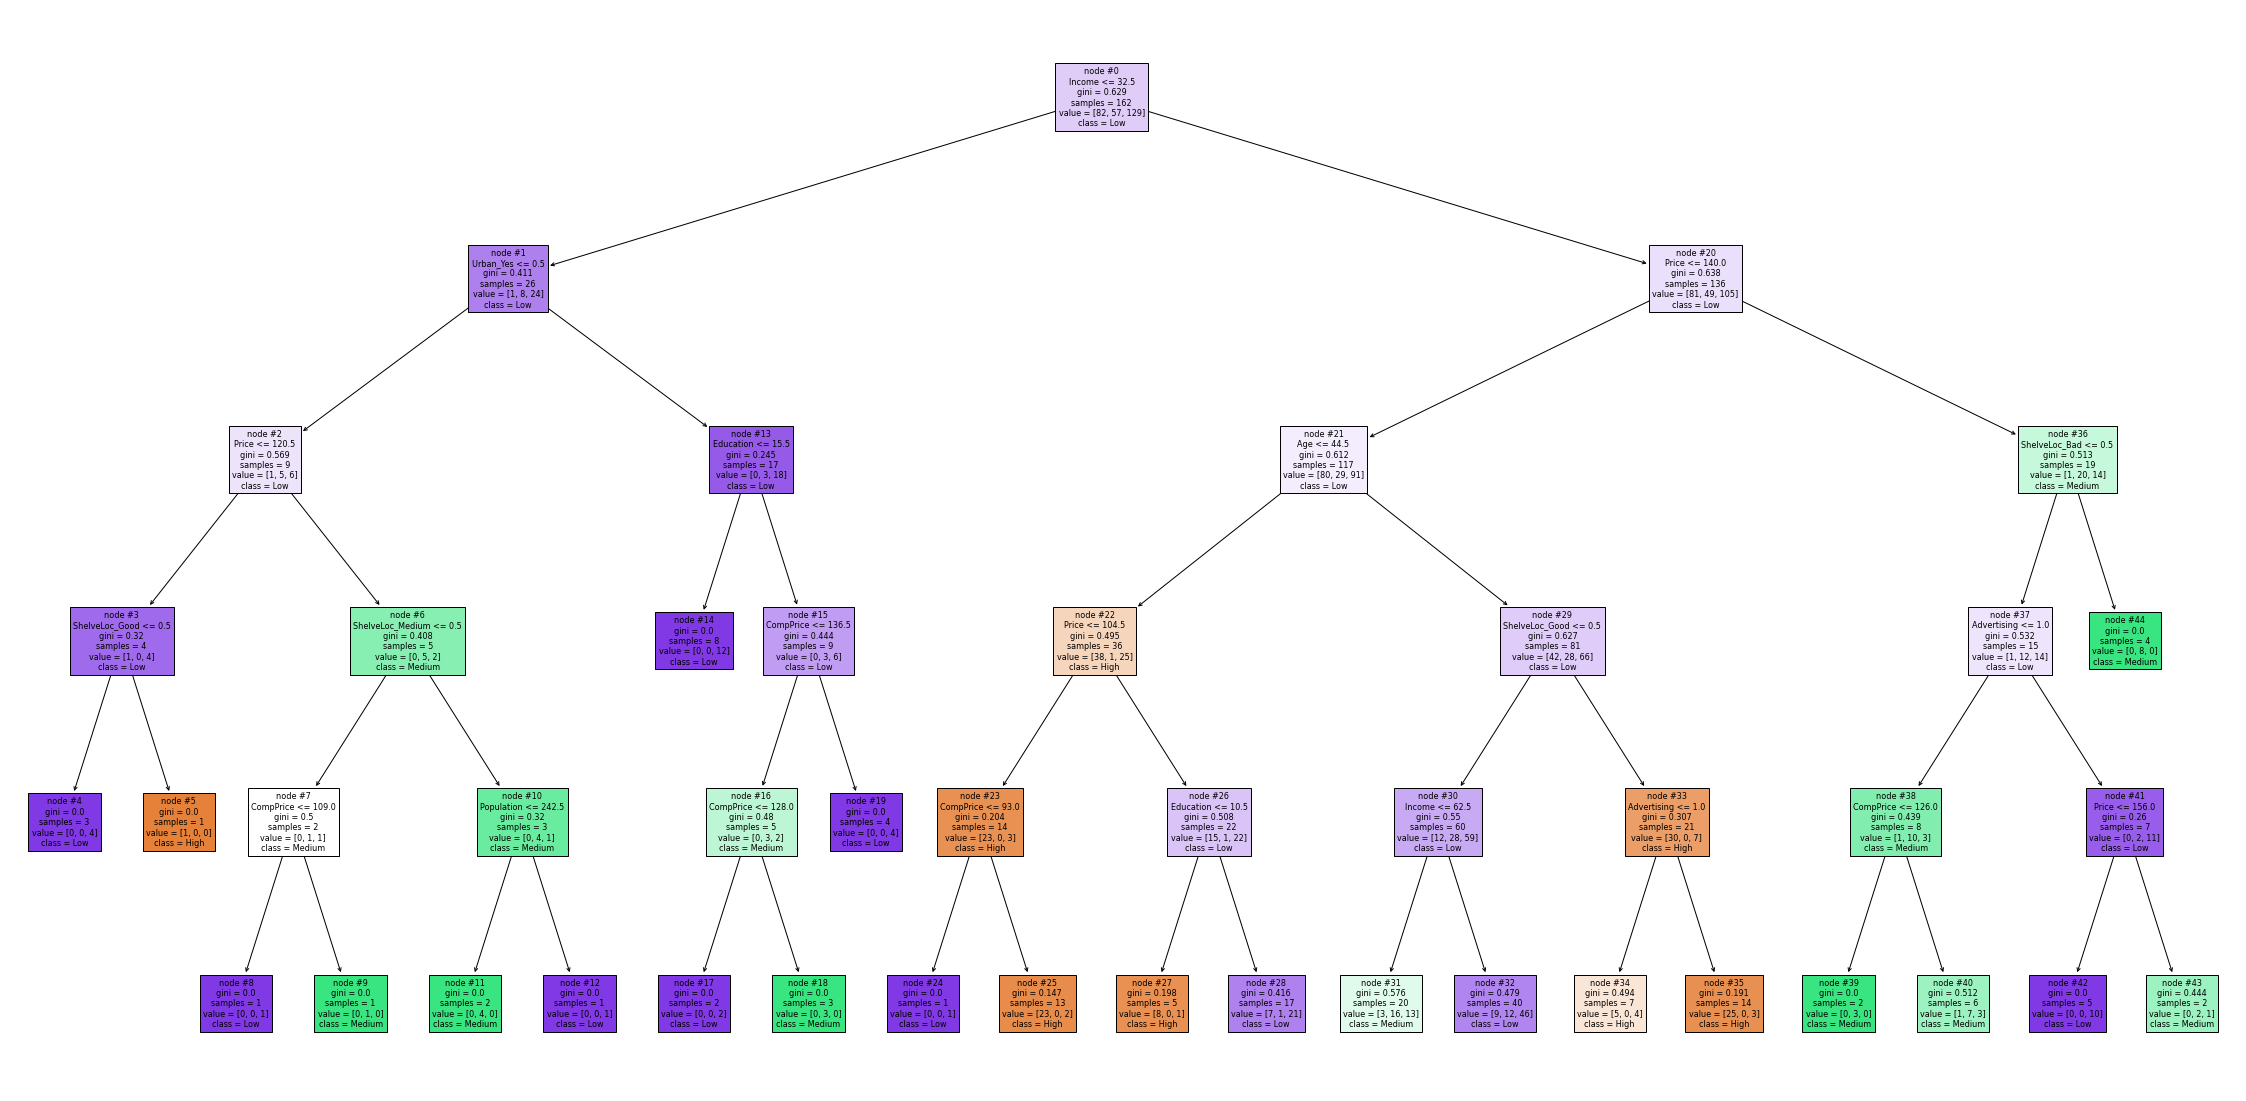

In [283]:
#tree - 20
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(model_2.estimators_[20], feature_names = X.columns,class_names=raw.Sales_cat.unique(),filled=True,node_ids=True)
plt.show()